In [1]:
%pip install transformers accelerate bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [2]:
!git clone https://github.com/BollywoodData/Bollywood-Data

Cloning into 'Bollywood-Data'...
remote: Enumerating objects: 1853, done.
remote: Total 1853 (delta 0), reused 0 (delta 0), pack-reused 1853 (from 1)
Receiving objects: 100% (1853/1853), 37.71 MiB | 12.70 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [3]:
%pip install -U torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201

In [4]:
from transformers import AutoProcessor, AutoModelForVision2Seq
from PIL import Image
import torch

model_id = "llava-hf/llava-1.5-7b-hf"

processor = AutoProcessor.from_pretrained(model_id)
model = AutoModelForVision2Seq.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    device_map="auto"
)

device = model.device
print(f"✅ Using device: {device}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


processor_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/674 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

✅ Using device: cuda:0


In [5]:
from google.colab import files
from PIL import Image
import torch

# 📤 Upload poster image
uploaded = files.upload()
img_path = next(iter(uploaded))  # Get filename
image = Image.open(img_path).convert("RGB")

Saving Aafat_img_2.jpg to Aafat_img_2.jpg


In [6]:
# ✅ Run inference
def detect_poster_bias(image):
    prompt = (
        "<|user|>\n<image>\nDescribe any gender bias or stereotypical portrayal in this movie poster. "
        "Focus on gender roles, clothing, body emphasis, or character positioning.\n<|assistant|>\n"
    )

    inputs = processor(images=image, text=prompt, return_tensors="pt").to(device)
    with torch.no_grad():
        output = model.generate(**inputs, max_new_tokens=200)

    result = processor.batch_decode(output, skip_special_tokens=True)[0]
    return result.strip()

# ✅ Print output
print("🎯 Poster Bias Output:\n", detect_poster_bias(image))

🎯 Poster Bias Output:
 <|user|>
 
Describe any gender bias or stereotypical portrayal in this movie poster. Focus on gender roles, clothing, body emphasis, or character positioning.
<|assistant|>
In the movie poster, there is a woman wearing a red dress and a man wearing a black shirt. The woman is positioned in a more provocative manner, with her hand on her face, while the man is positioned in a more neutral manner, with his hands behind his back. This portrayal of the woman as seductive and the man as non-threatening may reinforce gender stereotypes and contribute to a gender bias in the movie poster.


# Trailer


In [7]:
%pip install -q seaborn

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 120
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 14

In [10]:
file_path = r"/content/Bollywood-Data/trailer-data/complete-data.csv"

try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    print("⚠️ UTF-8 failed, trying 'ISO-8859-1'")
    df = pd.read_csv(file_path, encoding='ISO-8859-1')

print(f"\n Rows loaded: {len(df)}")
print(f" Columns detected: {df.columns.tolist()}")
print(f"\n Sample rows:\n{df.sample(3)}")

print("\n Null or blank counts per column:")
print(df.isnull().sum())
print(df.eq("").sum())



 Rows loaded: 32197
 Columns detected: ['frame_number', 'gender', 'emotion', 'year', 'movie_name']

 Sample rows:
       frame_number gender emotion  year        movie_name
20029            96    man    fear  2014  hasee_toh_phasee
20488            76    man     sad  2015         i_love_ny
6157            114    man     sad  2013            inkaar

 Null or blank counts per column:
frame_number    0
gender          0
emotion         0
year            0
movie_name      0
dtype: int64
frame_number    0
gender          0
emotion         0
year            0
movie_name      0
dtype: int64


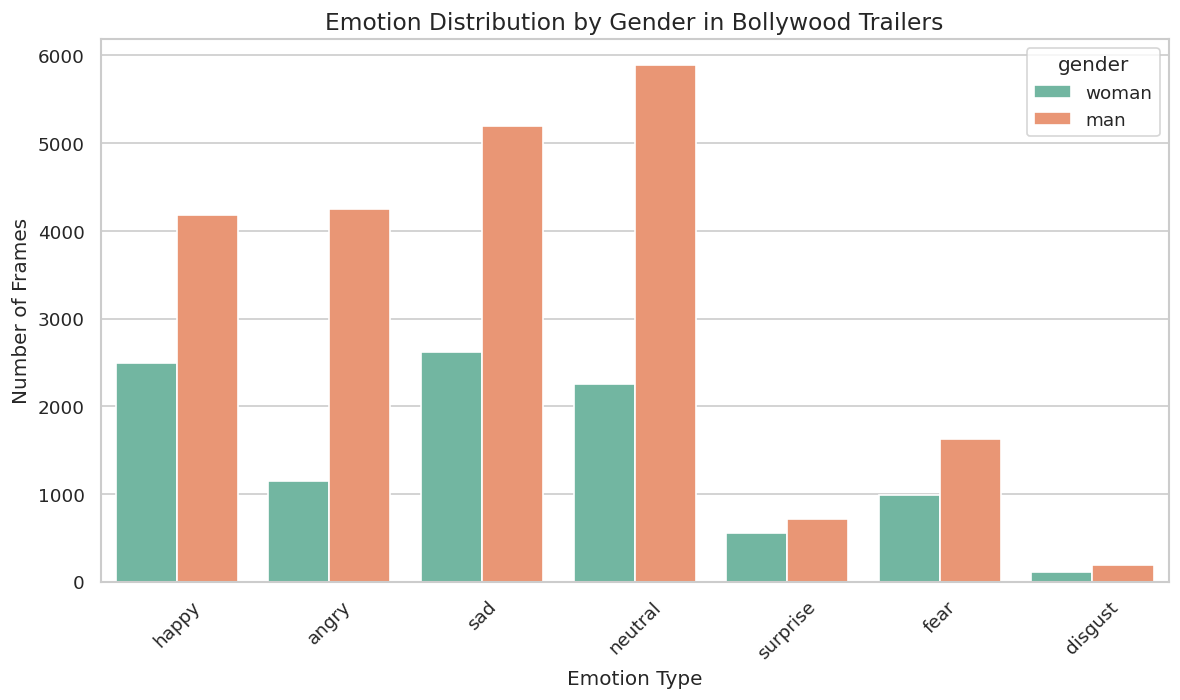

In [11]:
# 📊 Plot 1: Emotion count distribution by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='emotion', hue='gender', palette='Set2')
plt.title("Emotion Distribution by Gender in Bollywood Trailers")
plt.xlabel("Emotion Type")
plt.ylabel("Number of Frames")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plot1_emotion_count_by_gender.png")
plt.show()

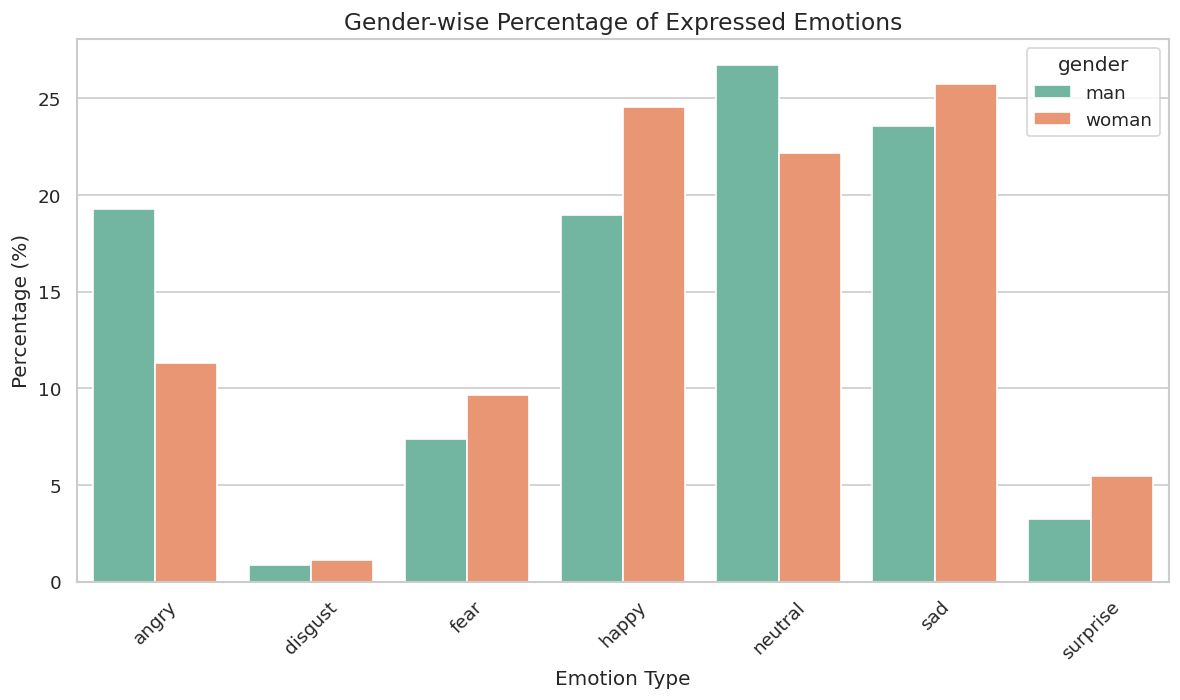

In [12]:
# 📊 Plot 2: Emotion percentage breakdown by gender
emotion_counts = df.groupby(['gender', 'emotion']).size().reset_index(name='count')
emotion_counts['percentage'] = emotion_counts.groupby('gender')['count'].transform(lambda x: 100 * x / x.sum())

plt.figure(figsize=(10, 6))
sns.barplot(data=emotion_counts, x='emotion', y='percentage', hue='gender', palette='Set2')
plt.title("Gender-wise Percentage of Expressed Emotions")
plt.ylabel("Percentage (%)")
plt.xlabel("Emotion Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plot2_emotion_percentage_by_gender.png")
plt.show()


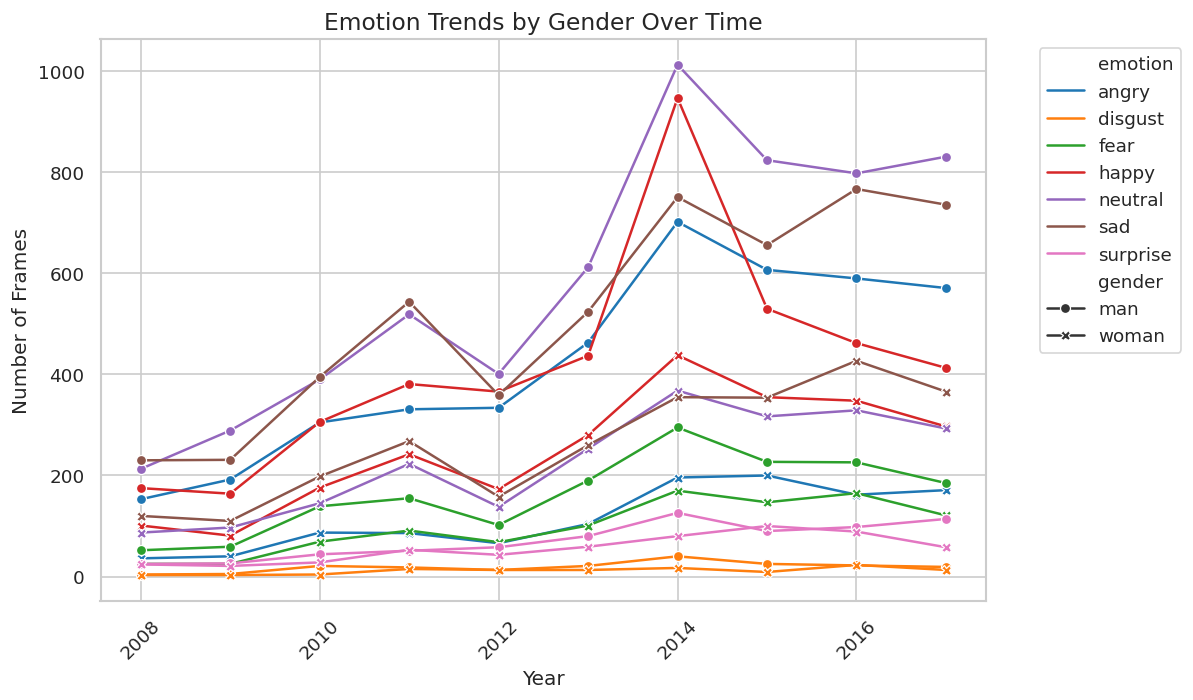

In [13]:
# 📈 Plot 3: Emotion frequency trends over time by gender
emotion_over_time = df.groupby(['year', 'gender', 'emotion']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=emotion_over_time,
    x='year', y='count',
    hue='emotion', style='gender',
    markers=True, dashes=False, palette='tab10'
)
plt.title("Emotion Trends by Gender Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Frames")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig("plot3_emotion_trends_over_time.png")
plt.show()
